In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
!pwd

/app/notebooks


In [3]:
wind_path = Path('../data/raw/NREL_Wind_Ordinances.xlsx')
solar_path = Path('../data/raw/NREL_Solar_Ordinances.xlsx')
assert wind_path.exists
assert solar_path.exists

In [4]:
wind = pd.read_excel(wind_path, sheet_name="County, State")
solar = pd.read_excel(solar_path, sheet_name="County, State")

/app/.local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
wind.head()

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
0,Alabama,NaN,Baldwin,Banned,NaN,NaN,Baldwin County Zoning Ordinance Sec. 13.13,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,No Change
1,Alabama,NaN,Cherokee,Sound,dBA,40,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
2,Alabama,NaN,Cherokee,Property Line,Meters,782,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
3,Alabama,NaN,Cherokee,Transmission,Max tip-height Multiplier,1.5,Ala. Code § 45-10-260.05,Minimum Setback of 1.5 the max height to an ov...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
4,Alabama,NaN,Dekalb,Sound,dBA,40,Ala. Code § 45-25-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN


## Data Cleaning
- [ ] Accuracy
- [ ] Atomicity
- [ ] Consistency
- [ ] Completeness
- [ ] Uniformity
- [ ] Validity
    - [ ] Range Validation
    - [ ] Uniqueness Validation
    - [ ] Set Membership Validation
    - [ ] Type Validation
    - [ ] Cross-Field Validation

## Accuracy
Spot check a few values.

## Atomicity
"Value" column has some multivalued entries, eg. sound levels that depend on time of day. Maybe model this with a simplified version and an indicator column letting you know to check the description for full details.

In [9]:
pd.to_numeric(wind['Value'])

ValueError: Unable to parse string "55/50/45" at position 28

In [19]:
# 6 (0.3%) multivalued entries
wind['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     6.000000
mean    0.003273
Name: Value, dtype: float64

In [118]:
wind[wind['Value'].str.contains('/').fillna(False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
28,California,NaN,Butte,Sound,dBA,55/50/45,Butte County Code § 24-157(E); Butte County Co...,55 dbA daytime; 50 dBa evening (7-10pm); 45 db...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
72,California,NaN,San Luis Obispo,Sound,dBa,70/65,San Luis Obispo County Code § 22.32.060(d)(4);...,"70 dBa maximum daytime (7am-10pm), 65 dBa Nigh...",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
78,California,NaN,Tehama,Sound,dBa,50/45,Tehama County Code § 17.83.080,50 dBa Day time/ 45 dBa Nighttime,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
114,Colorado,NaN,Lincoln,Sound,dBA,60/50,Lincoln County Zoning Resolution 3-210 (F)(7),60 dBa daytime (7am to 7pm) 50 dBa nighttime (...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
141,Florida,NaN,Osceola,Sound,dBA,55/45,Osceola County Code § 3.9(G),55 dBa daytime (7am to sunset) 45 dBa nighttim...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
1103,Nebraska,NaN,Hamilton,Sound,dBA,37/40,Hamilton County Zoning Regs. § 8.08.07,37 dB from 8pm to 8am; 40 dB from 8am to 8pm,NaN,NaN,NaN,2019.0,2022.0,NaN,NaN


In [13]:
pd.to_numeric(solar['Value'])

ValueError: Unable to parse string "22.86/60.96" at position 52

In [119]:
# 5 (0.6%) multivalued entries
solar['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     5.000000
mean    0.005967
Name: Value, dtype: float64

In [120]:
solar[solar['Value'].str.contains('/').fillna(False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
52,Florida,NaN,Leon,Property Line,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,"75' setback if facility is less than 50 acres,...",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
53,Florida,NaN,Leon,Roads,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
54,Florida,NaN,Leon,Structures,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
60,Florida,NaN,Palm Beach,Property Line,Meters,7.62/5,Palm Beach Unified Development Land Code § 7(C...,25 foot setback if lot size is greater than 50...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
730,Utah,NaN,Kane,Sound,dBA,65/50,Kane County Code Ords. § 9-24-3,65 db at property line; 50 db at nearest resid...,NaN,NaN,NaN,2013.0,NaN,NaN,NaN


## Consistency (vs other datasets in our database)
* replace county names with standard census names
* political jurisdictions need IDs to join with the rest of the datasets
* what to do with city/towns? They don't have FIPS codes
* wind and solar datasets look consistent with each other

## Completeness
* wind:
    * brownsville is missing its state (should be TX)
    * Cochise, AZ values weren't entered (present in comment but not in "Value" column)
* solar:
    * Lee County is missing its state (should be GA)

In [6]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   1832 non-null   object 
 1   City/Town               105 non-null    object 
 2   County                  1736 non-null   object 
 3   Feature Type            1833 non-null   object 
 4   Value Type              1776 non-null   object 
 5   Value                   1776 non-null   object 
 6   Citation                1833 non-null   object 
 7   Comment                 261 non-null    object 
 8   Updated Type            12 non-null     object 
 9   Updated Value           11 non-null     float64
 10  Updated Comment         12 non-null     object 
 11  Ordinance Year          484 non-null    float64
 12  Original Captured Date  1816 non-null   float64
 13  New Capture Date        242 non-null    float64
 14  Update Status           228 non-null    

In [27]:
wind.loc[wind['State'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
1656,NaN,Brownsville,NaN,Banned,NaN,NaN,Code of ordinances Division 2 - Wind Energy Sy...,WECs only used as secondary use; cannot exceed...,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [30]:
# null "Value" entries are almost all bans. Makes sense.
# Cochise, AZ has setbacks that weren't properly entered.
wind.loc[wind['Value'].isna(),"Feature Type"].str.strip().value_counts(dropna=False)

Banned           54
Property Line     1
Roads             1
Moratorium        1
Name: Feature Type, dtype: int64

In [7]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   837 non-null    object 
 1   City/Town               33 non-null     object 
 2   County                  812 non-null    object 
 3   Feature Type            838 non-null    object 
 4   Value Type              836 non-null    object 
 5   Value                   834 non-null    object 
 6   Citation                838 non-null    object 
 7   Comment                 160 non-null    object 
 8   Updated Type            0 non-null      float64
 9   Updated Value           0 non-null      float64
 10  Updated Comment         0 non-null      float64
 11  Ordinance Year          194 non-null    float64
 12  Original Captured Date  284 non-null    float64
 13  New Capture Date        0 non-null      float64
 14  Update Status           0 non-null      fl

In [31]:
solar.loc[solar['State'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
107,NaN,NaN,Lee,Structures,Meters,30.48,Lee County Code of Ordinances § 70-694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
solar.loc[solar['County'].isna() & solar['City/Town'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status


In [36]:
# null "Value" entries are all bans. Makes sense.
solar.loc[solar['Value'].isna(), :]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
4,Arizona,NaN,Pinal,Banned,N/a,NaN,Pinal Cnty. Ord. § 2.210.030(A),Solar PV is restricted from being the primary ...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
34,Colorado,NaN,Washington,Moratorium,N/a,NaN,Washington County Resolution 64-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,Minnesota,NaN,Wright,Moratorium,NaN,NaN,Wright County Amendment Ord. 21-1,"Moratorium on Commercial Solar as of May 18, 2021",NaN,NaN,NaN,NaN,2018.0,NaN,NaN
818,Washington,NaN,Grant,Banned,NaN,NaN,Grant County Ord. No. 21-080-CC,Six month moratorium beginning in august 2021(...,NaN,NaN,NaN,2021.0,NaN,NaN,NaN


## Uniformity
* string values need whitespace stripped
* replace "N/a" with NaN (watch out for whitespace)
* fix a handful of erroneous unit conversions
* some "Updated Type" entries look like misplaced comments
* Looking in Excel, the "Updated" columns have inconsistent formatting and will need some wrangling.

#### NaN values
Pandas automatically converts many common NaN representations, but the mixed capitalization of "N/a" seems to have fooled it

In [37]:
other_nan_values = {'n/a', 'none'}

In [39]:
solar['Value Type'].str.strip().str.lower().isin(other_nan_values).sum()

2

In [41]:
solar.eq('N/a').sum(axis=0)

State                     0
City/Town                 0
County                    0
Feature Type              0
Value Type                1
Value                     0
Citation                  0
Comment                   0
Updated Type              0
Updated Value             0
Updated Comment           0
Ordinance Year            0
Original Captured Date    0
New Capture Date          0
Update Status             0
dtype: int64

In [42]:
wind.eq('N/a').sum(axis=0)

State                     0
City/Town                 0
County                    0
Feature Type              0
Value Type                0
Value                     0
Citation                  0
Comment                   0
Updated Type              0
Updated Value             0
Updated Comment           0
Ordinance Year            0
Original Captured Date    0
New Capture Date          0
Update Status             0
dtype: int64

#### Distances in Meters vs Feet

In [93]:
feet = wind["Comment"].str.lower().str.extract(".*?(\d*,?\d+\.?\d*)(?:'| feet).*").squeeze().str.replace(',', '').astype(float)
is_distance = wind["Value Type"].str.lower().eq("meters")

In [94]:
is_distance.sum()

510

In [95]:
# not great coverage
feet.loc[is_distance].count()

88

In [97]:
ratios = feet.loc[is_distance].div(wind.loc[is_distance, "Value"].astype(float).values)

In [79]:
# feet_per_meter
100 / 2.54 / 12

3.2808398950131235

<AxesSubplot: >

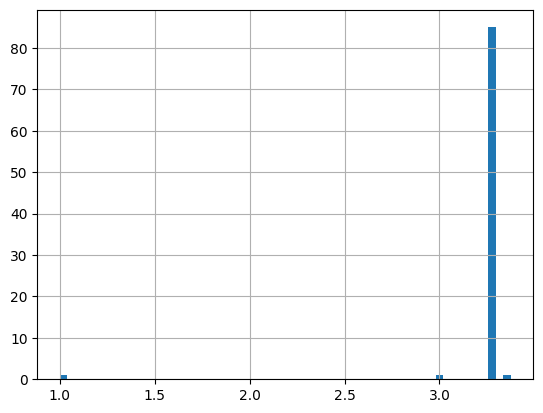

In [98]:
# most look good
ratios.hist(bins=60)

In [105]:
errors = ratios[ratios.lt(3.2) | ratios.gt(3.35)]
errors

26     3.375959
46     3.003003
647    1.000000
Name: 0, dtype: float64

In [106]:
# Only three errors: one is small, one in yards, one in feet
wind.loc[errors.index,:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
26,Arizona,NaN,Navajo,Structures,Meters,782,"Navajo County Ord. Art 20, 6-10(4)(w)",Setback is minimum half mile (2640 Feet) to re...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
46,California,NaN,Lassen,Height,Meters,33.3,Lassen County Code § 18.108.280(1),Maximum Height of 100 feet without use permit,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
647,Iowa,NaN,Johnson,Structures,Meters,1000,Johnson County Dev. Ord. § 8:5.8,Greater of 1000' setback or 1.1 max tip height,NaN,NaN,NaN,NaN,2021.0,NaN,NaN


Now for solar

In [107]:
feet = solar["Comment"].str.lower().str.extract(".*?(\d*,?\d+\.?\d*)(?:'| feet).*").squeeze().str.replace(',', '').astype(float)
is_distance = solar["Value Type"].str.lower().eq("meters")

In [108]:
is_distance.sum()

703

In [109]:
# not great coverage
feet.loc[is_distance].count()

132

In [111]:
ratios = feet.loc[is_distance].div(pd.to_numeric(solar.loc[is_distance, "Value"], errors='coerce').values)

<AxesSubplot: >

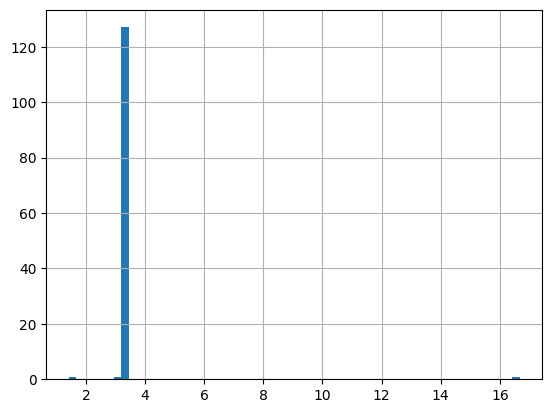

In [114]:
# most look good
ratios.hist(bins=60)

In [115]:
errors = ratios[ratios.lt(3.2) | ratios.gt(3.35)]
errors

6       1.415094
126     3.000000
130    16.666667
476     3.199692
479     3.199692
Name: 0, dtype: float64

In [117]:
# parsing error, yards, parsing error, rounding, rounding
solar.loc[errors.index,:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
6,California,NaN,Butte,Property Line,Meters,10.6,Butte County Code § 24-157(c),20 foot setback plus an additional 15' adjacen...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
126,Illinois,NaN,Adams,Height,Meters,10,Adams County Code Ord. § 5-7-3(c),30' Max Height,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
130,Illinois,NaN,Carroll,Property Line,Meters,6,Carroll County Code § 725.1(f),20 foot setback unless next to residential zon...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
476,Nebraska,NaN,Madison,Roads,Meters,25.94,Madison County Zoning Regs. § 603(C),83' setback to centerline of roads,NaN,NaN,NaN,NaN,2018.0,NaN,NaN
479,Nebraska,NaN,Pierce,Roads,Meters,25.94,Pierce County Zoning Regs. § 6.04.01,83' setback to centerline of roads,NaN,NaN,NaN,NaN,2018.0,NaN,NaN


#### Distance formulas: Tip Height multipliers, constants, or both
Setbacks are commonly expressed as either constant distances (eg 100 meters) or as a multiple of turbine max tip height (eg 1.1x). But sometimes they are both, aka a linear equation (aka 1.1x + 20 meters).

* to facilitate computation, the linear expressions should be broken into pieces.

In [24]:
# 22 (1.2%) entries have a linear equation
wind['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     22.000000
mean     0.012002
Name: Value, dtype: float64

In [121]:
wind[wind['Value'].str.contains('\+').fillna(False)].sample(5)

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
779,Kansas,NaN,Lyon,Transmission,Max tip-height Multiplier,1 + 12.19 Meters,Lyon County Wind Energy Ordinance Art. 8 Sec. 808,NaN,NaN,NaN,NaN,2008.0,2022.0,NaN,NaN
1423,North Dakota,NaN,McLean,Property Line,Max tip-height Multiplier,1 + 22.86 Meters,6.5.11 WIND ENERGY FACILITES,NaN,NaN,NaN,NaN,NaN,2018.0,2022.0,No change
1243,New York,Cohocton Town,NaN,Property Line,Max tip-height Multiplier,2 + 30.48 Meters,Cohocton Zoning II. Industrial Windmills,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
807,Kansas,NaN,Reno,Property Line,Max tip-height Multiplier,1+ 15.24 Meters,Reno County Zoning Ordinance Art. 23 CWECS Reg...,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
1242,New York,Cohocton Town,NaN,Roads,Max tip-height Multiplier,1 + 30.48 Meters,Cohocton Zoning II. Industrial Windmills,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [127]:
# no linear solar stuff
solar['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     0.0
mean    0.0
Name: Value, dtype: float64

## Uniqueness Validation
Primary key looks to be (state, city/town, county, feature type) with value columns value type, value and citation (plus some updates).

For wind:
* there are a few duplicates with conflicting values. Most look like updates (one has a later "Captured Date") so I'll plan to use the latest one.
* one (Allegany County, MD) is a triple-valued conditional. Other rows like that were expressed with a single value "1/2/3"
* Adams and LaSalle IL have multiple structure setbacks conditional on either on/off site or whether they are residential.

For solar:
* a handful of duplicates that differ only in the "updated" columns
* some places have different setbacks conditioned on residential zoning or front/side of parcel

In [126]:
pd.options.display.max_colwidth = None
wind[wind.duplicated(subset=['State', 'City/Town', 'County', 'Feature Type'], keep=False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
38,California,NaN,Kern,Property Line,Max tip-height Multiplier,2,Kern County Code § 19.64.140(F),lesser of 2x max tip height or 500 feet to property line unless owned by same project developer if project is less than 40 acres in size,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,California,NaN,Kern,Property Line,Max tip-height Multiplier,1.5,Kern County Code § 19.64.140(F),lesser of 1.5x max tip height or 500 feet to property line unless owned by same project developer if project is more than 40 acres in size,NaN,NaN,NaN,NaN,2018.0,2021.0,No Change
45,California,NaN,Lassen,Structures,Meters,6,Lassen County Code § 18.108.280 (2),NaN,20 foot setback to any structure on the property,NaN,NaN,NaN,2021.0,NaN,NaN
47,California,NaN,Lassen,Structures,Meters,3.6576,Lassen County Code § 18.108.280 (2),NaN,NaN,NaN,NaN,NaN,2018.0,2021.0,No Change
65,California,NaN,San Bernardino,Property Line,Max tip-height Multiplier,2,San Bernadino County Dev. Code § 84.29.030,"Setback of 2x max tip height if project is on less than 40 acres, waived if common property line is shared by project owner",NaN,NaN,NaN,NaN,NaN,2022.0,NaN
66,California,NaN,San Bernardino,Property Line,Max tip-height Multiplier,1.5,San Bernadino County Dev. Code § 84.29.030,"Setback of 1.5x max tip height if project is on more than 40 acres, waived if common property line is shared by project owner",NaN,NaN,NaN,NaN,NaN,2022.0,NaN
161,Illinois,NaN,Adams,Structures,Meters,402.3,Adams County Code § 5-6-7(f),Primary Structures offsite,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
164,Illinois,NaN,Adams,Structures,Max tip-height Multiplier,1.1,Adams County Code § 5-6-7(f),Primary structure onsite,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
268,Illinois,NaN,LaSalle,Structures,Meters,365.76,LaSalle County Ord. § 7.1(RR),1200 foot setback to residences,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
270,Illinois,NaN,LaSalle,Structures,Hub-height Multiplier,1.5,LaSalle County Ord. § 7.1(RR),"1.5 x tower height for ""other structures""",NaN,NaN,NaN,NaN,2021.0,NaN,NaN


In [128]:
solar[solar.duplicated(subset=['State', 'City/Town', 'County', 'Feature Type'], keep=False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
37,Florida,NaN,Clay,Property Line,Meters,7.62,Clay County Land Development Code § 3-2(bo),25' Setbacks if not adjacent to residential zones,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
38,Florida,NaN,Clay,Property Line,Meters,30.48,Clay County Land Development Code § 3-2(bo),100' setback if adjacent to residential zone,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
50,Florida,NaN,Jefferson,Property Line,Meters,30.48,Jefferson County Land Development Code § 2.11.4,100' landscape buffer from vacant or nonresidential parcels,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
51,Florida,NaN,Jefferson,Property Line,Meters,60.96,Jefferson County Land Development Code § 2.11.4,200' landscape buffer for residential parcels,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
219,Indiana,NaN,Clinton,Property Line,Meters,15.24,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
220,Indiana,NaN,Clinton,Structures,Meters,60.96,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
221,Indiana,NaN,Clinton,Height,Meters,6.096,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Indiana,NaN,Clinton,Property Line,Meters,15.24,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Indiana,NaN,Clinton,Structures,Meters,60.96,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Indiana,NaN,Clinton,Height,Meters,6.096,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Membership Validation

#### State
Will check exact values when assigning FIPS codes

In [130]:
# <= 51
wind['State'].nunique()

44

In [131]:
# <= 51
solar['State'].nunique()

36

#### Feature Type
* some mis-spellings and mixed plurals
* bunch of named entities like rivers/lakes/highways

In [135]:
wind['Feature Type'].str.strip().str.lower().value_counts(dropna=False)

structures                   372
property line                353
roads                        344
sound                        219
transmission                 182
height                        91
railroads                     61
banned                        54
water                         35
minimum lot size              22
tower density                 18
density                       15
shadow flicker                13
rivers                         8
highways                       7
total installation             3
missouri river                 3
wabash river                   2
oil & gas pipelines            2
maximum installation size      1
property                       1
lake audubon                   1
lake sakakawea                 1
appalachian trail              1
waccamaw river                 1
pee dee river                  1
lake oahe                      1
highway                        1
black river                    1
north santee river             1
mississipp

In [136]:
solar['Feature Type'].str.strip().str.lower().value_counts(dropna=False)

property line              232
height                     190
structures                 137
roads                      117
minimum lot size            49
sound                       33
highway                     20
maximum lot size            14
waters                       7
density                      5
maximum lot coverage         4
coverage                     4
total installation           4
moratorium                   2
noise                        2
total installation size      2
banned                       2
maximum project size         2
rivers                       2
lakes                        1
mimimum lot size             1
property lines               1
wetlands                     1
sounds                       1
m.d. route 413               1
u.s. route 13                1
railroads                    1
road                         1
lankford highway             1
Name: Feature Type, dtype: int64

#### Value Type
* some mis-spellings and mixed plurals
* bunch of named entities like rivers/lakes/highways

In [137]:
wind['Value Type'].str.strip().str.lower().value_counts(dropna=False)

max tip-height multiplier    928
meters                       516
dba                          218
NaN                           57
rotor-diameter multiplier     28
rotor diameter multiplier     28
acres                         23
hrs/year                      13
hub-height multiplier          8
turbines                       3
kw                             2
meter                          2
turbine count                  1
minimum lot size               1
rotor-radius                   1
max tip-height                 1
rotor diameter mutliplier      1
rotor diameter                 1
max-tip height multiplier      1
Name: Value Type, dtype: int64

In [138]:
solar['Value Type'].str.strip().str.lower().value_counts(dropna=False)

meters                                 706
acres                                   71
dba                                     36
maximum structure height                 9
percentage                               9
n/a                                      2
NaN                                      2
maximum structure height multiplier      1
meter                                    1
megawatt                                 1
Name: Value Type, dtype: int64

## Range Validation
## Type Validation

In [19]:
wind['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     6.000000
mean    0.003273
Name: Value, dtype: float64

In [22]:
pd.to_numeric(wind.loc[~wind['Value'].str.contains('/').fillna(False), "Value"])

ValueError: Unable to parse string "1 + 25 ft" at position 99

In [24]:
wind['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     22.000000
mean     0.012002
Name: Value, dtype: float64

In [25]:
pd.to_numeric(wind.loc[~wind['Value'].str.contains('/|\+').fillna(False), "Value"])

ValueError: Unable to parse string "5000 or less" at position 1421

## Cross-Field Validation

In [12]:
wind['Feature Type'].str.strip().value_counts(dropna=False)

Structures                   372
Property Line                353
Roads                        344
Sound                        219
Transmission                 182
Height                        91
Railroads                     61
Banned                        54
Water                         35
Minimum Lot Size              19
Tower Density                 18
Density                       15
Shadow Flicker                13
Rivers                         8
Highways                       7
Missouri River                 3
Minimum lot size               3
Total Installation             3
Oil & Gas Pipelines            2
Wabash River                   2
Highway                        1
Lake Oahe                      1
Lake Sakakawea                 1
Appalachian Trail              1
Lake Audubon                   1
Maximum Installation Size      1
Maximum Instillation Size      1
Property                       1
Waccamaw River                 1
Pee Dee River                  1
Black Rive